# Imports, constants

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FixedLocator

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, precision_recall_fscore_support,confusion_matrix, accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [3]:
DATASET = "./date_tema_1_iaut_2024.csv"
NUMERICAL_COLUMNS = [
    "Age",
    "Est_avg_calorie_intake",
    "Main_meals_daily",
    "Height",
    "Water_daily",
    "Weight",
    "Sedentary_hours_daily",
    "Physical_activity_level",
    "Regular_fiber_diet",
]
CATEGORICAL_COLUMNS = [
    "Transportation",
    "Diagnostic_in_family_history",
    "High_calorie_diet",
    "Alcohol",
    "Snacks",
    "Smoker",
    "Calorie_monitoring",
    "Technology_time_use",
    "Gender"
]

In [4]:
df = pd.read_csv(DATASET)

In [5]:
df.head()

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
0,Public_Transportation,2,yes,no,"3,73",21,no,2474,3,Sometimes,"1,62",no,2,no,64,0,1,Female,D1
1,Public_Transportation,3,yes,no,"2,92",21,Sometimes,2429,3,Sometimes,"1,52",yes,3,yes,56,3,0,Female,D1
2,Public_Transportation,2,yes,no,"3,85",23,Frequently,2656,3,Sometimes,"1,8",no,2,no,77,2,1,Male,D1
3,Walking,3,no,no,"3,01",27,Frequently,2260,3,Sometimes,"1,8",no,2,no,-1,2,0,Male,D2
4,Public_Transportation,2,no,no,"2,73",22,Sometimes,1895,1,Sometimes,"1,78",no,2,no,"89,8",0,0,Male,D3


# Data analysis

In [6]:
for col in NUMERICAL_COLUMNS:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)
for col in CATEGORICAL_COLUMNS:
    df[col] = df[col].astype("category")

X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Frecventa claselor

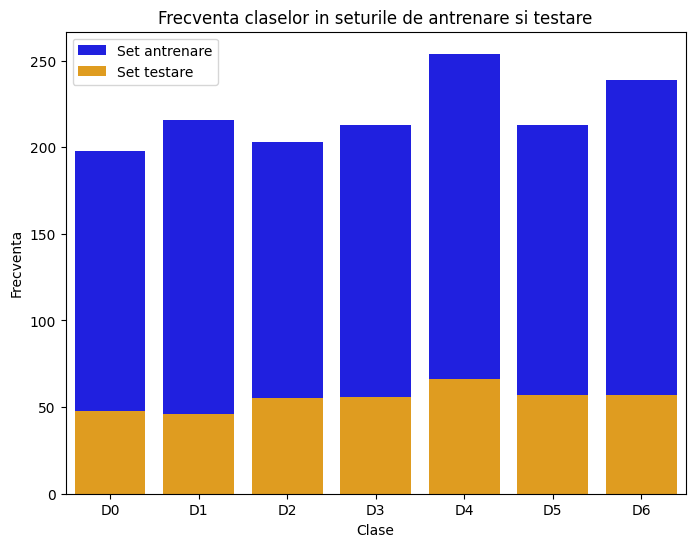

In [ ]:
plt.figure(figsize=(8, 6))
classes = np.unique(np.concatenate((y_train.values, y_test.values)))

sns.countplot(data=y_train, x=y_train.columns[0], color='blue', label='Set antrenare', order=classes)
sns.countplot(data=y_test, x=y_test.columns[0], color='orange', label='Set testare', order=classes)

plt.title("Frecventa claselor in seturile de antrenare si testare")
plt.xlabel("Clase")
plt.ylabel("Frecventa")
plt.legend()
plt.show()

## Atribute numerice

Statistics for column 'Age':
Mean: 44.79250626392504
Standard Deviation: 633.3118370767136
Min: 15.0
Max: 19685.0
Range: 19670.0
Median: 22.829753
Interquartile Range: 19.97166 - 26.0 (6.02834)

Outliers
[41.0, 52.0, 39.0, 55.0, 38.0, 61.0, 44.0, 36.0, 38.0, 55.0, 45.0, 38.0, 39.0, 41.0, 41.0, 40.0, 51.0, 56.0, 38.0, 38.0, 41.0, 40.0, 37.0, 40.0, 37.0, 41.0, 36.0, 37.0, 38.0, 36.0, 45.0, 41.823567, 36.769646, 35.194089, 42.24475, 37.455752, 40.0, 38.943282, 35.483601, 40.0, 38.939448, 39.965474, 38.692265, 36.631456, 19627.0, 39.214514, 19685.0, 38.825189, 35.217173, 55.24625, 42.189023, 38.464538, 37.496175, 50.832559, 36.310292, 43.238402, 45.0, 55.137881, 38.378056, 39.170029, 46.491859, 38.384177, 37.205173, 37.492444, 35.456326, 39.392569, 37.275298, 55.022494, 41.743333, 37.642177, 47.7061, 35.719457, 35.432059, 39.585811, 45.821267, 39.759575, 43.604901, 42.31607, 37.356288, 40.821515, 37.955371, 40.317787, 35.389491, 40.951591, 39.135634, 37.832949, 37.631769, 37.524551, 43.510

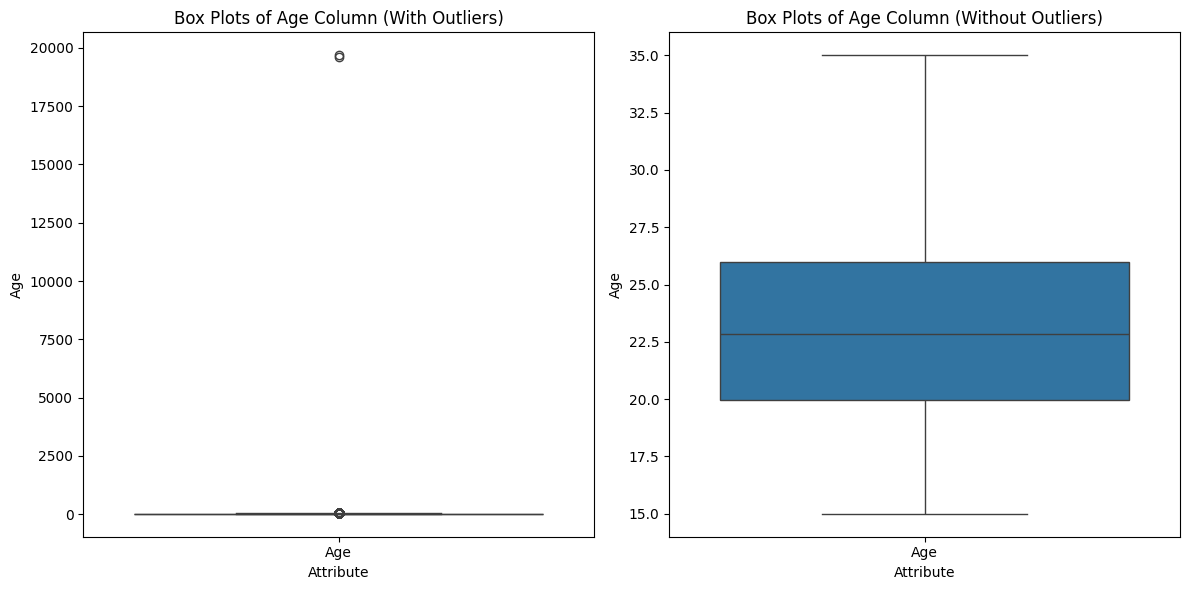

Statistics for column 'Est_avg_calorie_intake':
Mean: 2253.68766267569
Standard Deviation: 434.07579419142866
Min: 1500.0
Max: 3000.0
Range: 1500.0
Median: 2253.0
Interquartile Range: 1871.0 - 2628.0 (757.0)

Outliers
[]
True outliers
{'values': [], 'indexes': []}


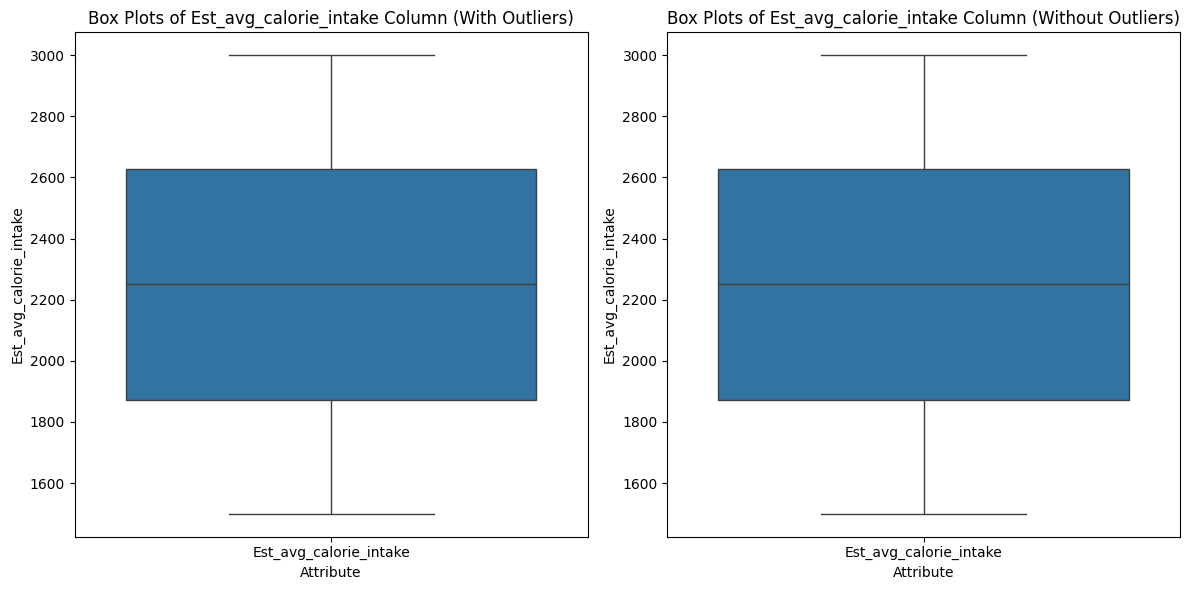

Statistics for column 'Main_meals_daily':
Mean: 2.683471861009891
Standard Deviation: 0.7791790556845525
Min: 1.0
Max: 4.0
Range: 3.0
Median: 3.0
Interquartile Range: 2.658639 - 3.0 (0.341361)

Outliers
[1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 4.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 4.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 4.0, 3.995147, 1.600812, 1.73762, 1.10548, 2.0846, 1.0, 1.0, 1.0, 1.0, 1.0, 3.765526, 4.0, 3.691226, 

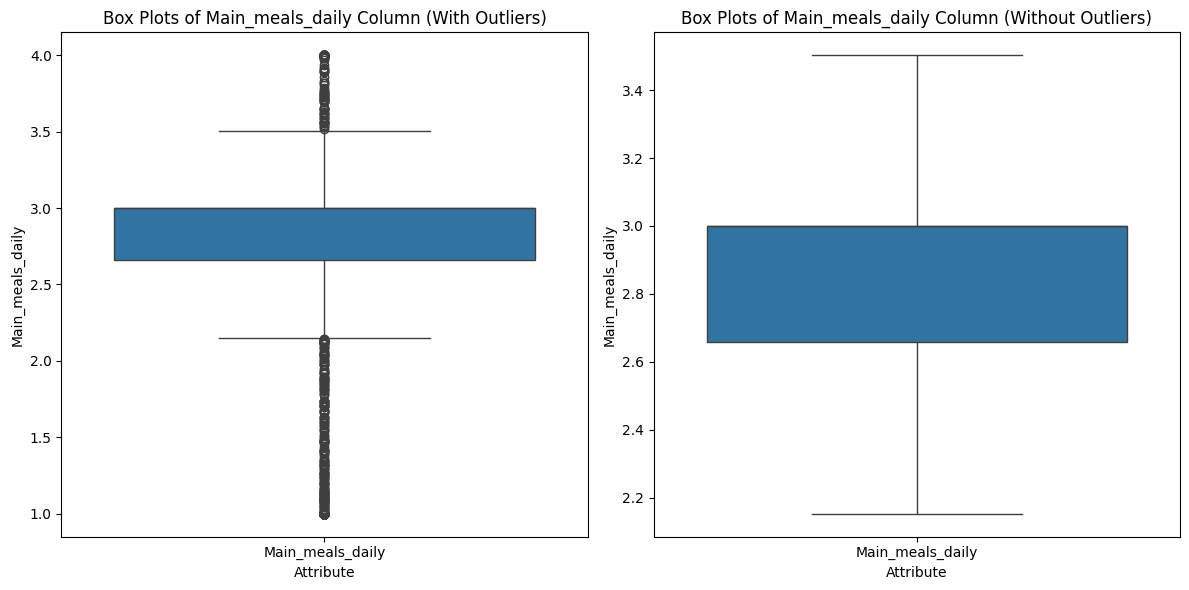

Statistics for column 'Height':
Mean: 3.5734877667881313
Standard Deviation: 58.09815976912103
Min: 1.45
Max: 1915.0
Range: 1913.55
Median: 1.7
Interquartile Range: 1.63 - 1.77 (0.14000000000000012)

Outliers
[1683.0, 1915.0]
True outliers
{'values': [1683.0, 1915.0], 'indexes': [1326, 1523]}


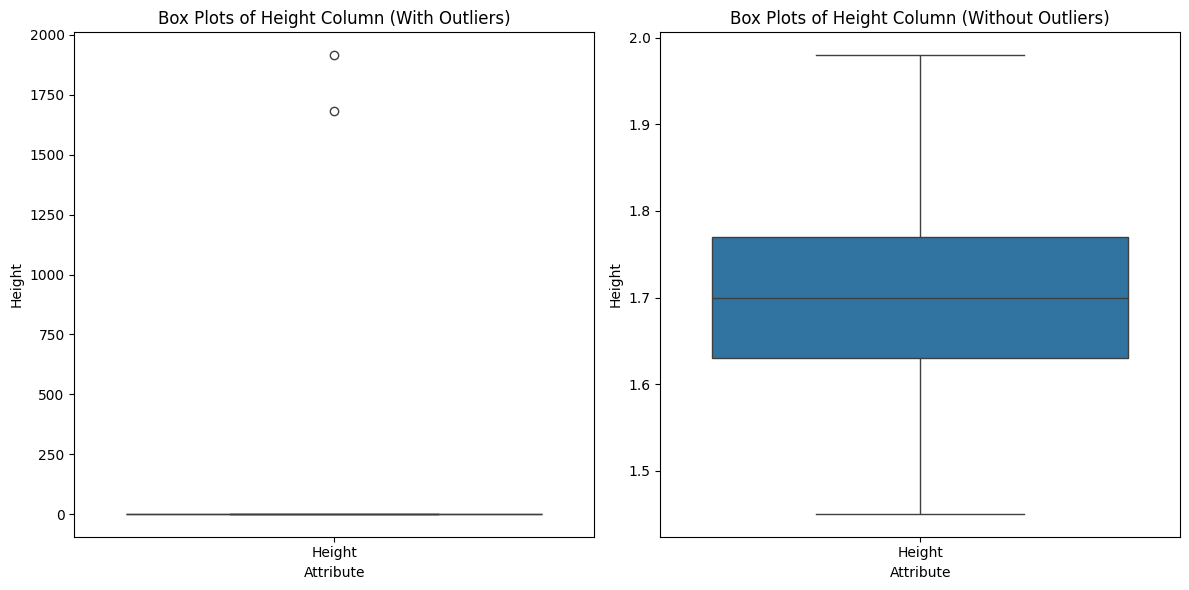

Statistics for column 'Water_daily':
Mean: 2.010367264445601
Standard Deviation: 0.6110342044515745
Min: 1.0
Max: 3.0
Range: 2.0
Median: 2.0
Interquartile Range: 1.606076 - 2.480555 (0.8744789999999998)

Outliers
[]
True outliers
{'values': [], 'indexes': []}


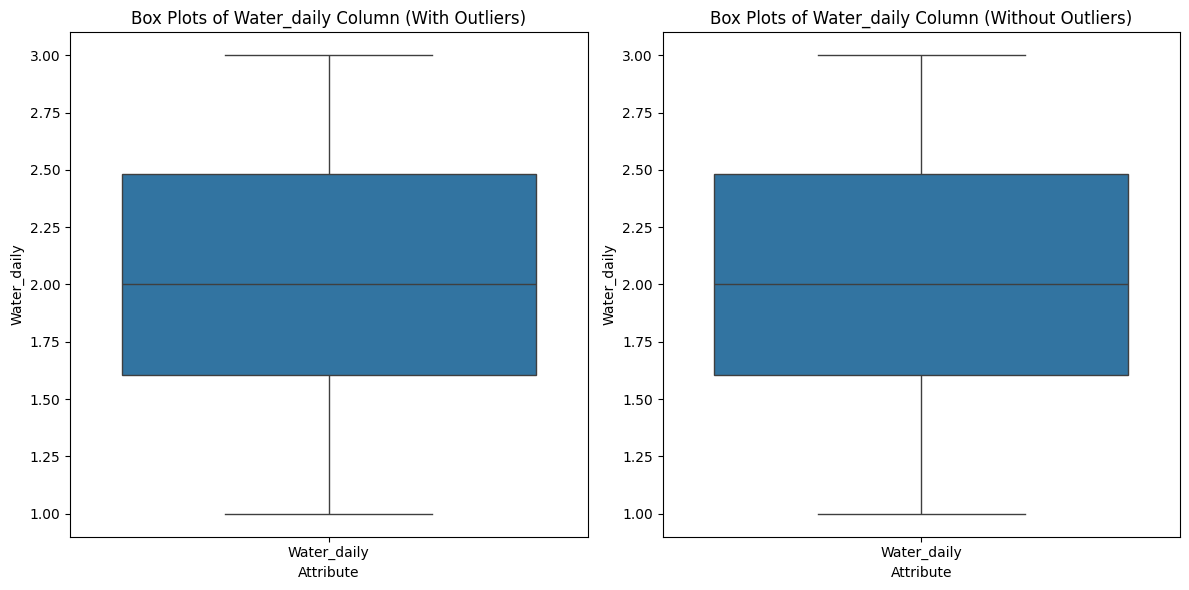

Statistics for column 'Weight':
Mean: 205.63734420249872
Standard Deviation: 3225.6535358208953
Min: -1.0
Max: 82628.0
Range: 82629.0
Median: 80.386078
Interquartile Range: 58.83071 - 105.036075 (46.20536499999999)

Outliers
[80539.0, 82628.0, 82039.0]
True outliers
{'values': [80539.0, 82628.0, 82039.0], 'indexes': [924, 1177, 1375]}


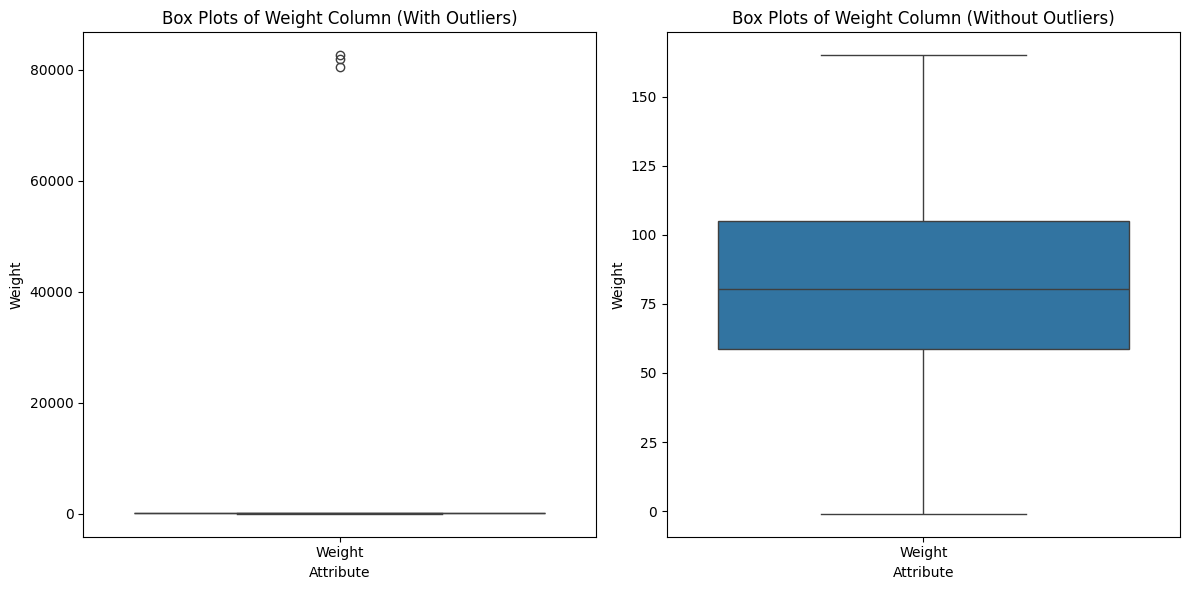

Statistics for column 'Sedentary_hours_daily':
Mean: 3.693571056741281
Standard Deviation: 21.759834908880748
Min: 2.21
Max: 956.58
Range: 954.37
Median: 3.13
Interquartile Range: 2.77 - 3.64 (0.8700000000000001)

Outliers
[956.58]
True outliers
{'values': [956.58], 'indexes': [801]}


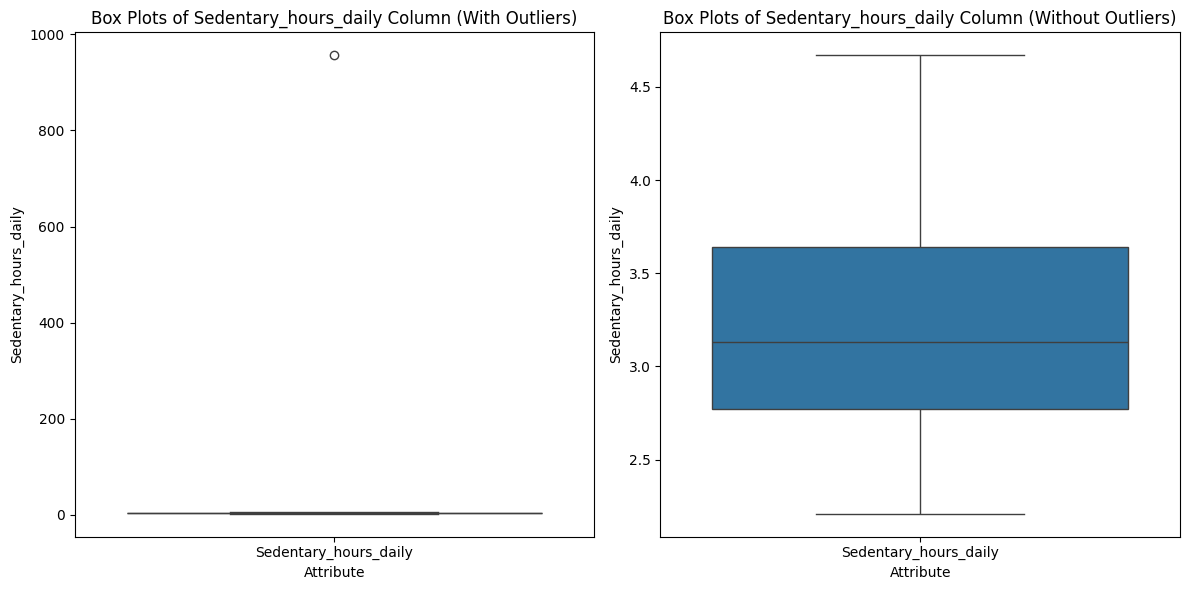

Statistics for column 'Physical_activity_level':
Mean: 1.0126402805830297
Standard Deviation: 0.8555256424802281
Min: 0.0
Max: 3.0
Range: 3.0
Median: 1.0
Interquartile Range: 0.115974 - 1.683497 (1.567523)

Outliers
[]
True outliers
{'values': [], 'indexes': []}


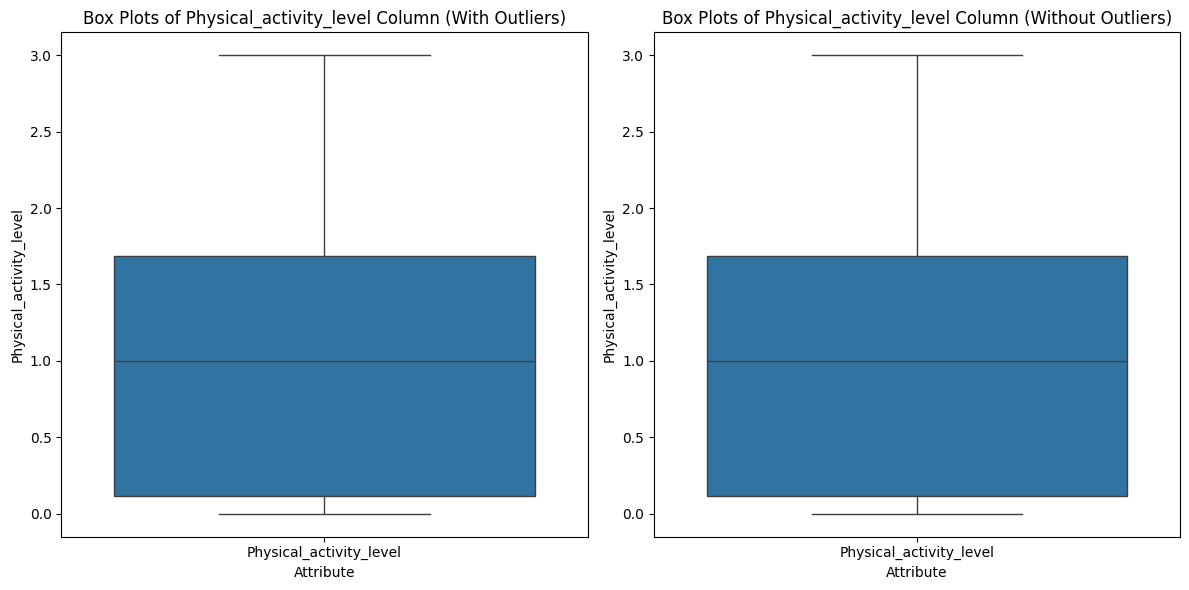

Statistics for column 'Regular_fiber_diet':
Mean: 3.8449373862571576
Standard Deviation: 62.4396174995684
Min: 1.0
Max: 2739.0
Range: 2738.0
Median: 2.387426
Interquartile Range: 2.0 - 3.0 (1.0)

Outliers
[2739.0]
True outliers
{'values': [2739.0], 'indexes': [1598]}


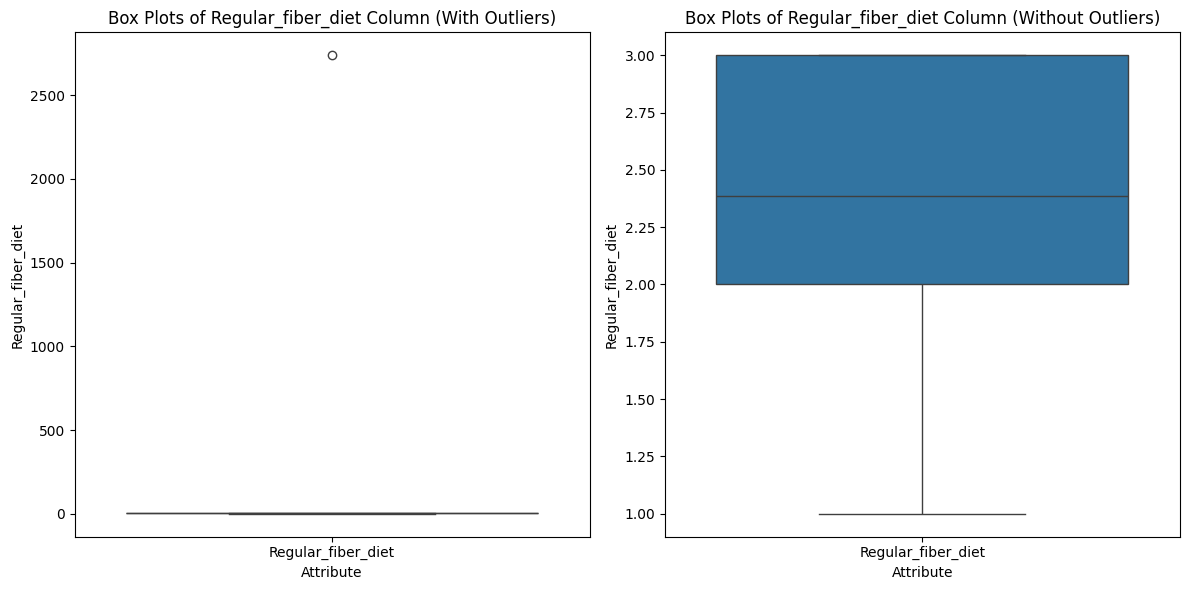

Final outliers
{'Age': [845, 878], 'Est_avg_calorie_intake': [], 'Main_meals_daily': [], 'Height': [1326, 1523], 'Water_daily': [], 'Weight': [924, 1177, 1375], 'Sedentary_hours_daily': [801], 'Physical_activity_level': [], 'Regular_fiber_diet': [1598]}


In [ ]:
outliers_final = {}
X = df.iloc[:, :-1]
# Iterate over each numerical column
for col in NUMERICAL_COLUMNS:
    curr_data = X[col]
    mean = curr_data.mean()
    std_dev = curr_data.std()
    min_value = curr_data.min()
    max_value = curr_data.max()
    range_ = max_value - min_value
    median = curr_data.median()
    Q1 = curr_data.quantile(0.25)
    Q3 = curr_data.quantile(0.75)
    IQR = Q3 - Q1

    print(f"Statistics for column '{col}':")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Min: {min_value}")
    print(f"Max: {max_value}")
    print(f"Range: {range_}")
    print(f"Median: {median}")
    print(f"Interquartile Range: {Q1} - {Q3} ({IQR})")
    print()
    print("Outliers")
    outliers = curr_data[(curr_data < (Q1 - 1.5 * IQR)) | (curr_data > (Q3 + 1.5 * IQR))]
    print(outliers.to_list())

    if col == "Age":
      outliers = outliers[outliers > 100]
    elif col == "Main_meals_daily":
      outliers = outliers[(outliers < 1.0) | (outliers > 4.0)]

    print("True outliers")
    print({"values": outliers.tolist(), "indexes": outliers.index.tolist()})

    outliers_final[col] = outliers.index.tolist()
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.boxplot(data=[curr_data], ax=axes[0])
    axes[0].xaxis.set_major_locator(FixedLocator([0]))
    axes[0].set_xticklabels([col])
    axes[0].set_xlabel("Attribute")
    axes[0].set_ylabel(col)
    axes[0].set_title(f"Box Plots of {col} Column (With Outliers)")

    sns.boxplot(data=[curr_data], showfliers=False, ax=axes[1])
    axes[1].xaxis.set_major_locator(FixedLocator([0]))
    axes[1].set_xticklabels([col])
    axes[1].set_xlabel("Attribute")
    axes[1].set_ylabel(col)
    axes[1].set_title(f"Box Plots of {col} Column (Without Outliers)")

    plt.tight_layout()
    plt.show()

print("Final outliers")
print(outliers_final)

In [ ]:
# sns.pairplot(X)

## Categorical Data

Numărul de valori unice în coloana Transportation: 5
Lista de valori unice în coloana Transportation: ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']
Categories (5, object): ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']


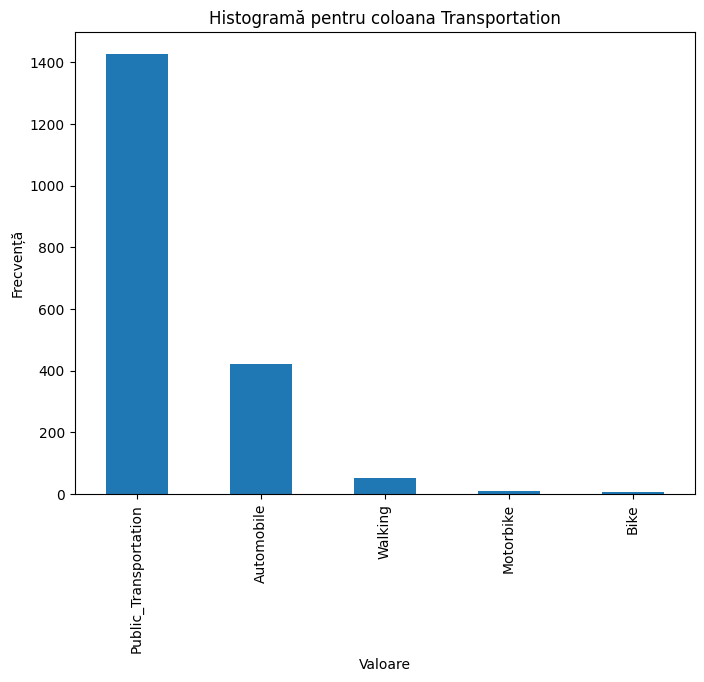

Numărul de valori unice în coloana Diagnostic_in_family_history: 2
Lista de valori unice în coloana Diagnostic_in_family_history: ['yes', 'no']
Categories (2, object): ['no', 'yes']


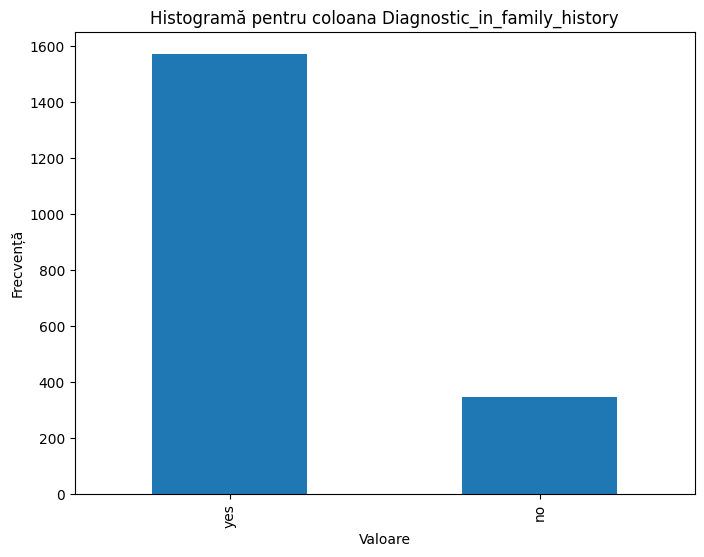

Numărul de valori unice în coloana High_calorie_diet: 2
Lista de valori unice în coloana High_calorie_diet: ['no', 'yes']
Categories (2, object): ['no', 'yes']


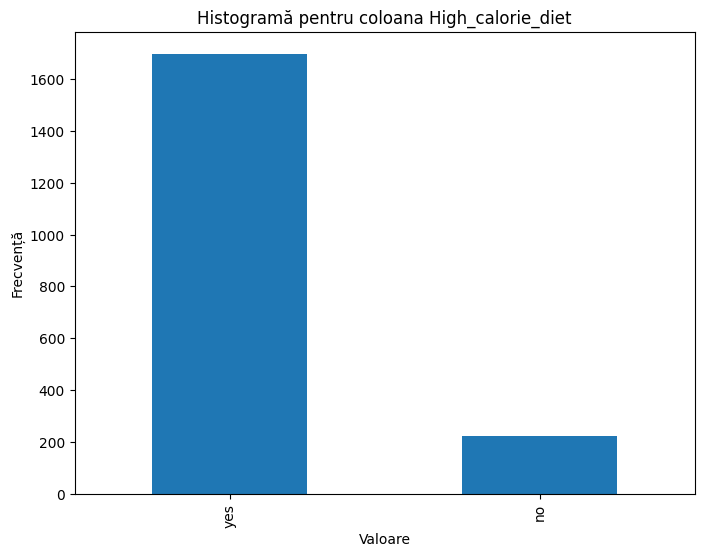

Numărul de valori unice în coloana Alcohol: 4
Lista de valori unice în coloana Alcohol: ['no', 'Sometimes', 'Frequently', 'Always']
Categories (4, object): ['Always', 'Frequently', 'Sometimes', 'no']


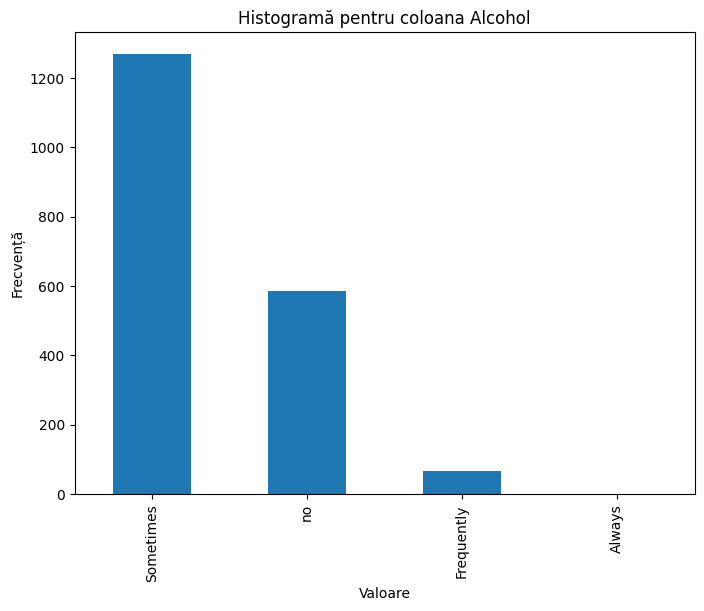

Numărul de valori unice în coloana Snacks: 4
Lista de valori unice în coloana Snacks: ['Sometimes', 'Frequently', 'Always', 'no']
Categories (4, object): ['Always', 'Frequently', 'Sometimes', 'no']


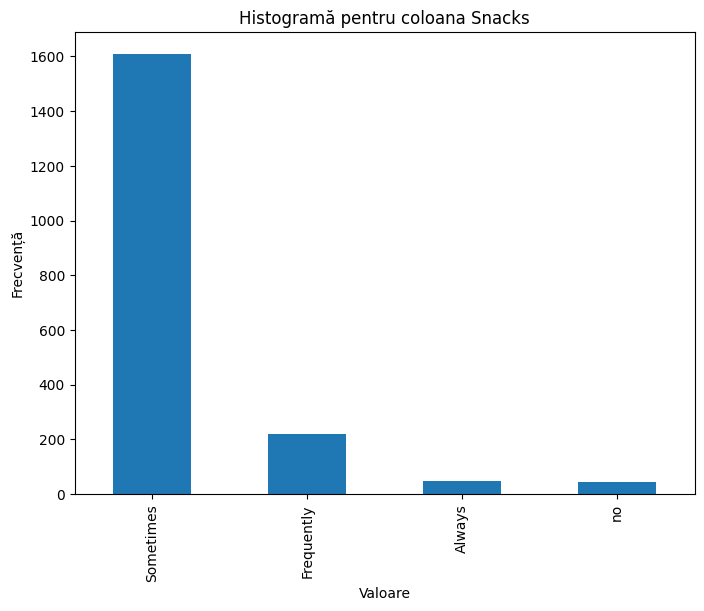

Numărul de valori unice în coloana Smoker: 2
Lista de valori unice în coloana Smoker: ['no', 'yes']
Categories (2, object): ['no', 'yes']


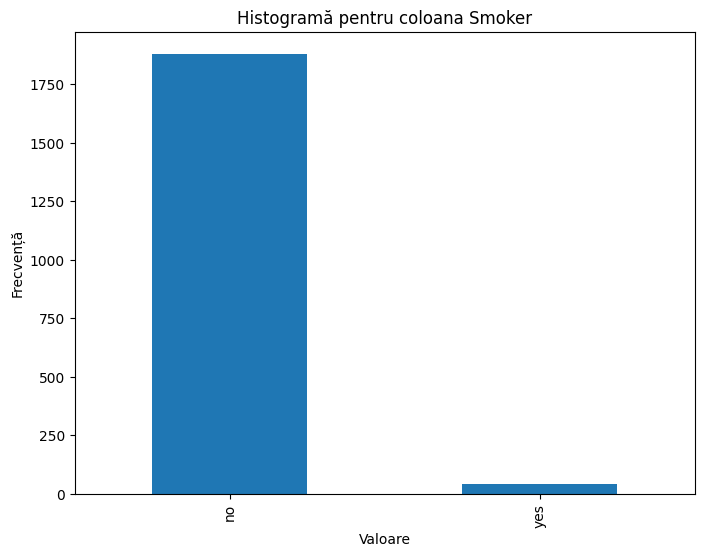

Numărul de valori unice în coloana Calorie_monitoring: 2
Lista de valori unice în coloana Calorie_monitoring: ['no', 'yes']
Categories (2, object): ['no', 'yes']


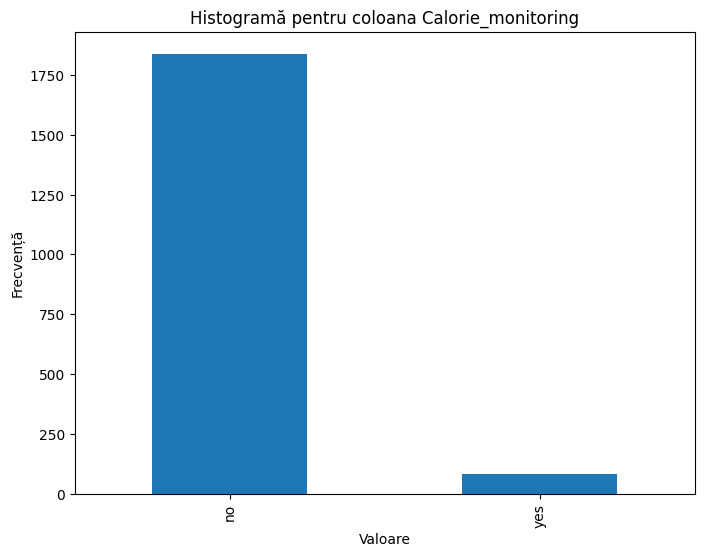

Numărul de valori unice în coloana Technology_time_use: 4
Lista de valori unice în coloana Technology_time_use: [1, 0, 2, 1306]
Categories (4, int64): [0, 1, 2, 1306]


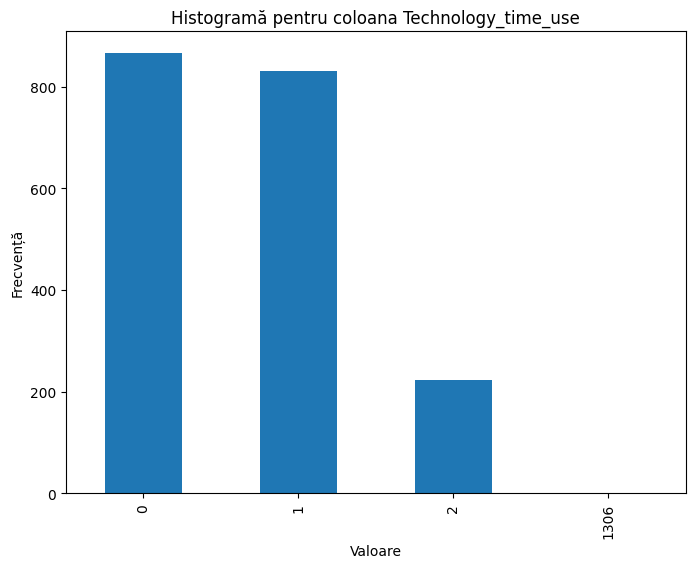

Numărul de valori unice în coloana Gender: 2
Lista de valori unice în coloana Gender: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']


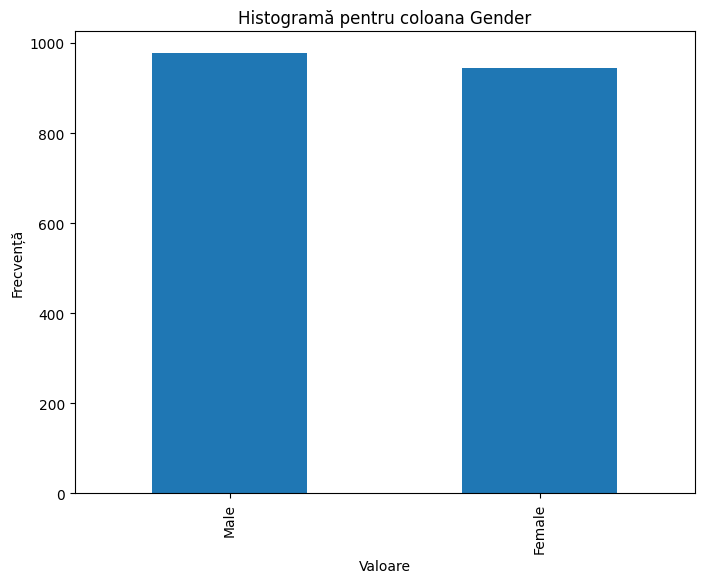

In [7]:
for col in CATEGORICAL_COLUMNS:
    curr_data = X[col]
    unique_values = curr_data.nunique()
    unique_list = curr_data.unique()
    print(f"Numărul de valori unice în coloana {col}: {unique_values}")
    print(f"Lista de valori unice în coloana {col}: {unique_list}")
    plt.figure(figsize=(8, 6))
    curr_data.value_counts().plot(kind='bar')
    plt.title(f'Histogramă pentru coloana {col}')
    plt.xlabel('Valoare')
    plt.ylabel('Frecvență')
    plt.show()


# Correlation

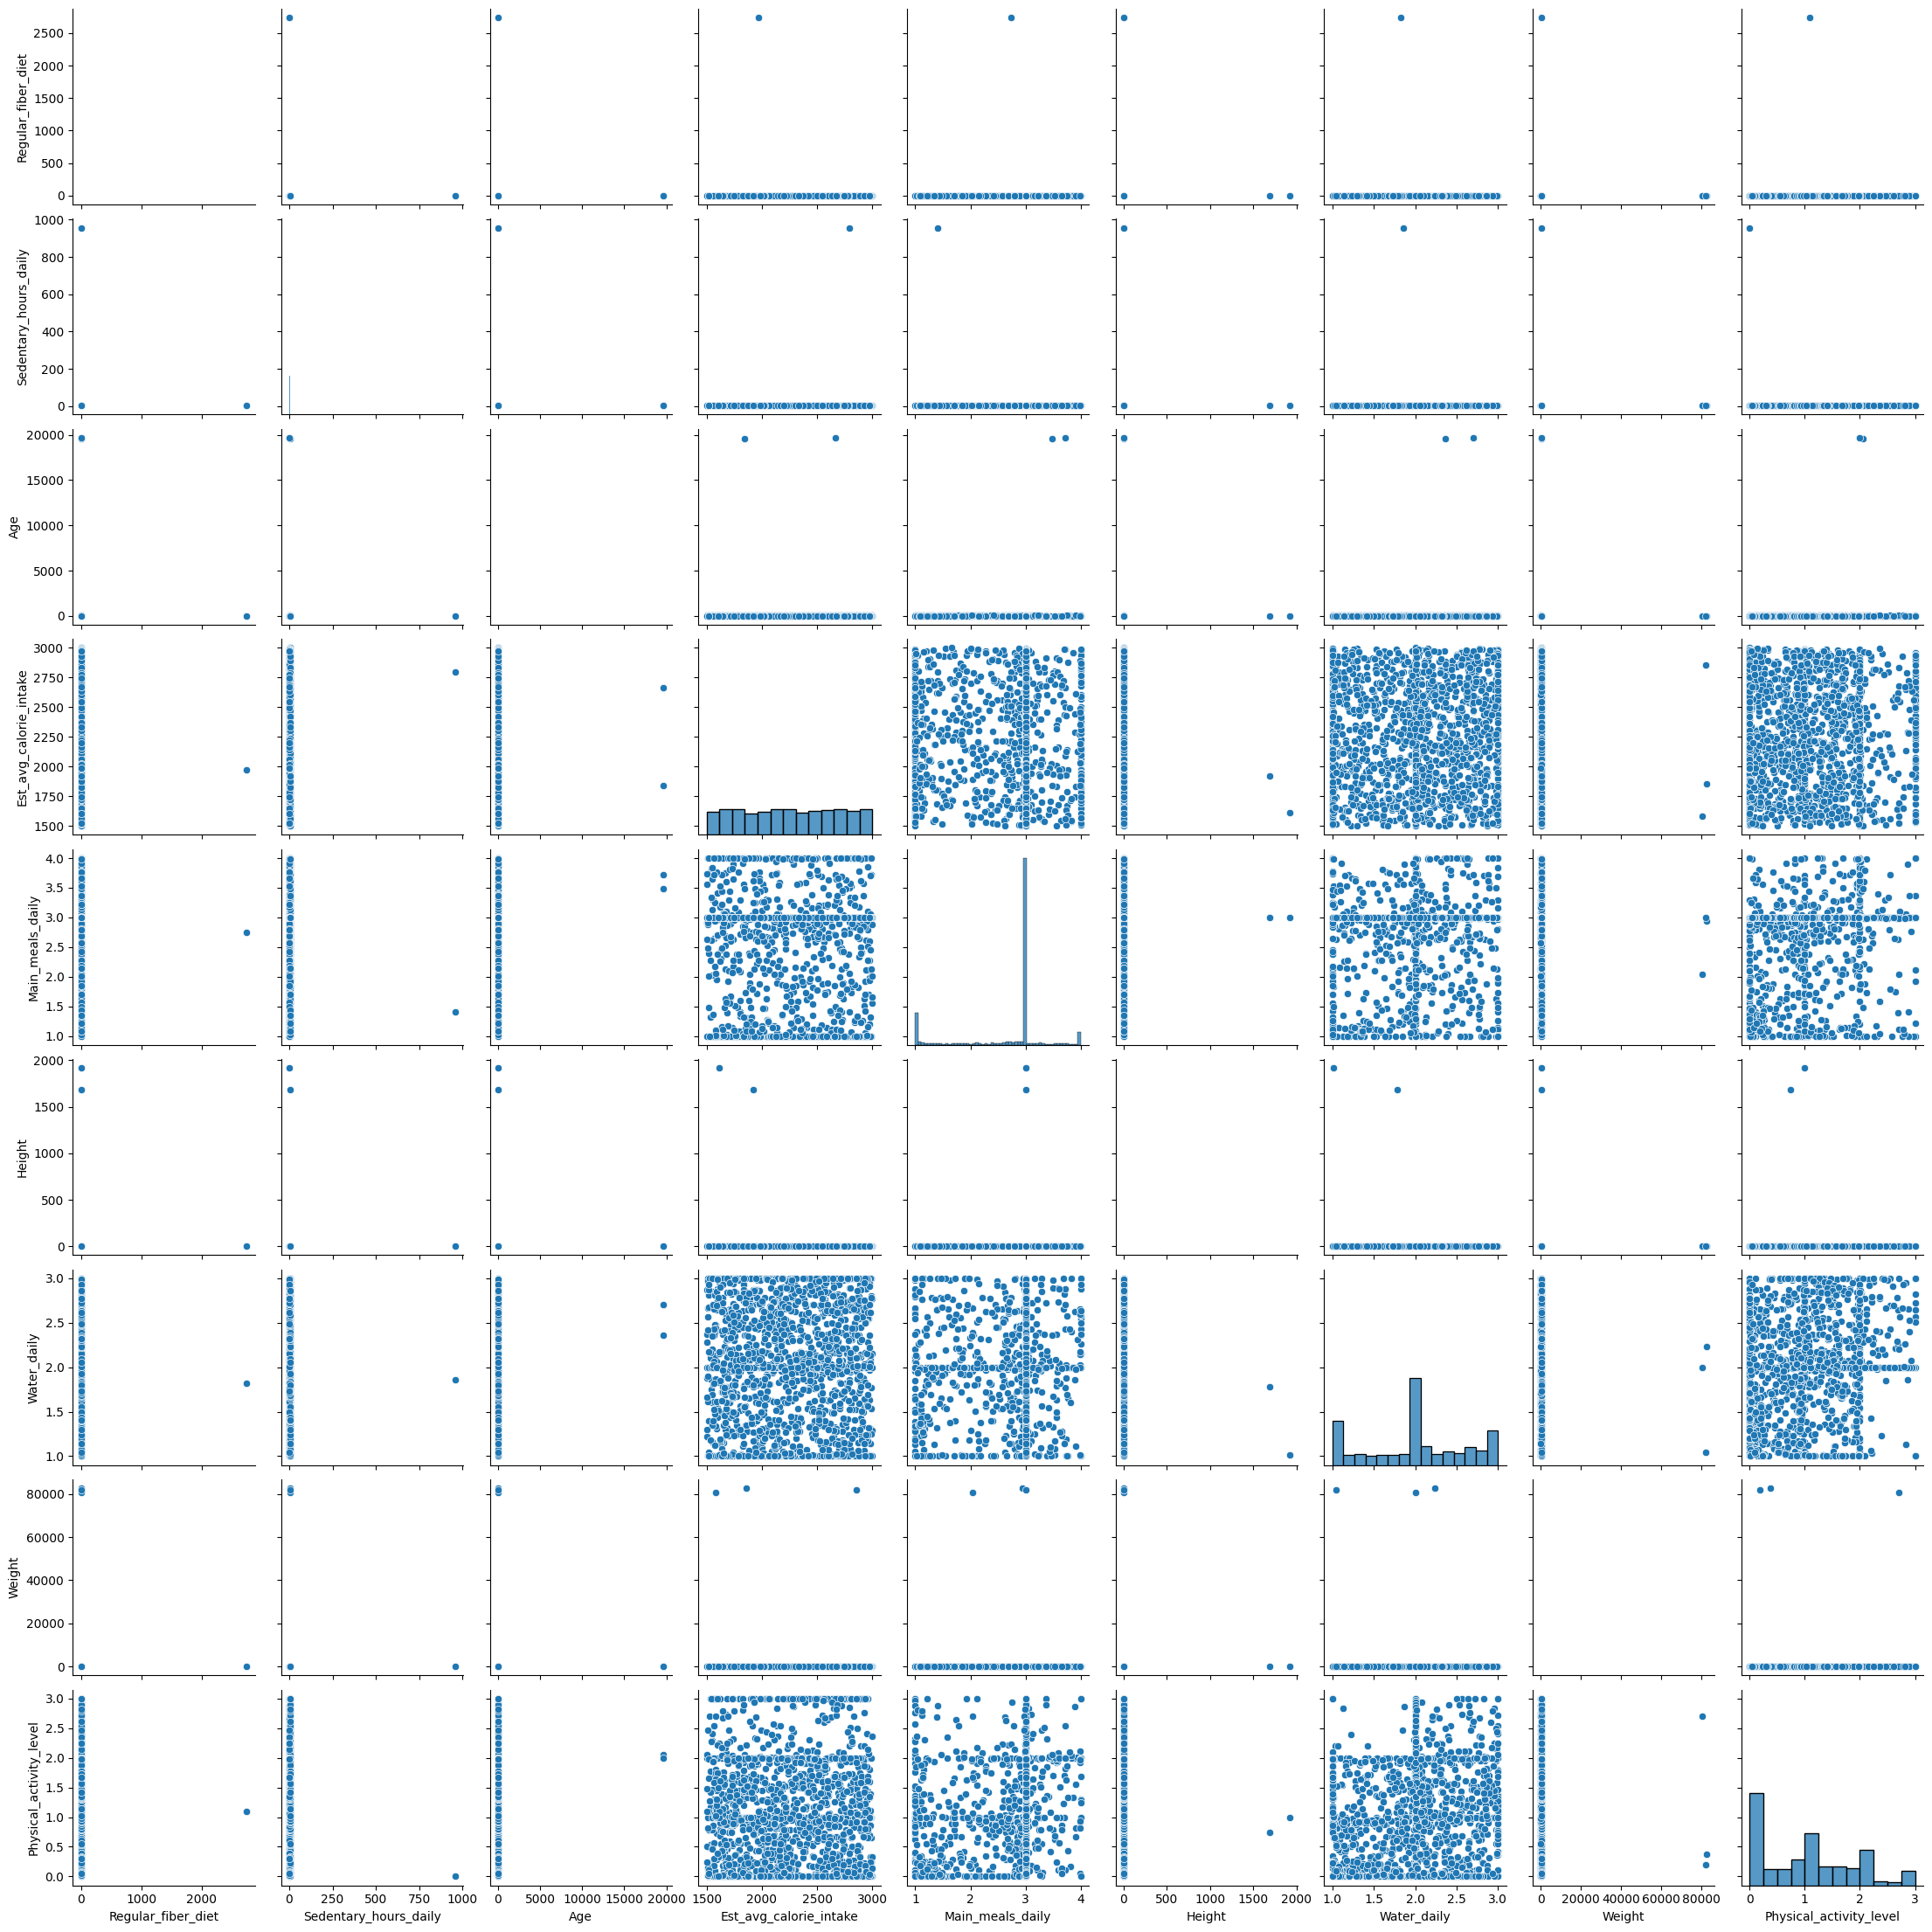

In [8]:
sns.pairplot(X)

<Axes: >

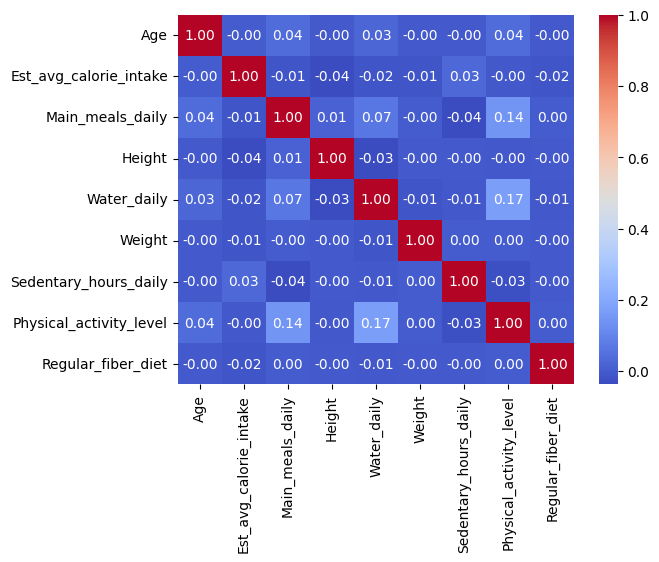

In [10]:
correlation_matrix = df[NUMERICAL_COLUMNS].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

                              p-value
Physical_activity_level  2.072151e-18
Water_daily              1.690878e-09
Est_avg_calorie_intake   9.333263e-02
Main_meals_daily         2.568993e-01
Regular_fiber_diet       3.026383e-01
Height                   3.101095e-01
Weight                   4.354628e-01
Age                      5.002470e-01
Sedentary_hours_daily    5.174884e-01


<ipython-input-16-52d68812fad4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=p_values_sorted.index, y="p-value", data=p_values_sorted, palette="viridis")


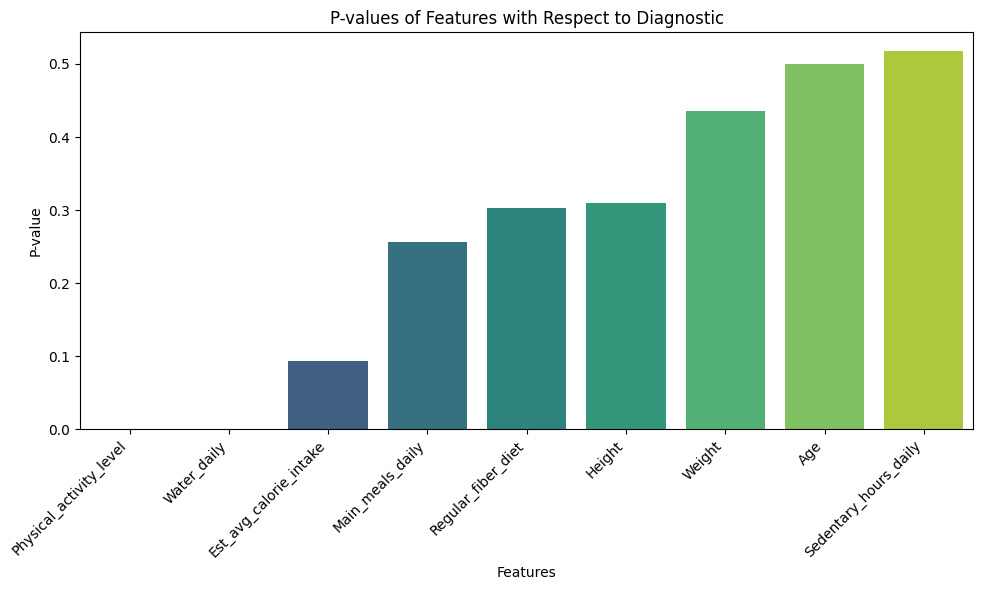

In [16]:
import scipy.stats as stats
df["Diagnostic"] = df["Diagnostic"].astype("category")
le = LabelEncoder()
df["Diagnostic"] = le.fit_transform(df["Diagnostic"])
# Initialize a DataFrame to store p-values
p_values = pd.DataFrame()

# Loop through each feature column and calculate the p-value with respect to the target column
for feature in df[NUMERICAL_COLUMNS]:
    if feature != "Diagnostic":
        pearson_coef, p_value = stats.pearsonr(df[feature], df["Diagnostic"])
        p_values.loc[feature, "p-value"] = p_value

# Sort the p-values in ascending order
p_values_sorted = p_values.sort_values(by="p-value")

# Print or visualize the sorted p-values
print(p_values_sorted)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the p-values
plt.figure(figsize=(10, 6))
sns.barplot(x=p_values_sorted.index, y="p-value", data=p_values_sorted, palette="viridis")
plt.xlabel("Features")
plt.ylabel("P-value")
plt.title("P-values of Features with Respect to Diagnostic")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

                                chi2_stat
Gender                         626.351379
Diagnostic_in_family_history  1191.584071
High_calorie_diet             1270.132743
Technology_time_use           1421.698594
Calorie_monitoring            1667.044768
Smoker                        1795.559084
Alcohol                       2672.384695
Snacks                        4178.758459
Transportation                4198.133264


<ipython-input-18-2787db733a01>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=p_values_sorted.index, y="chi2_stat", data=p_values_sorted, palette="viridis")


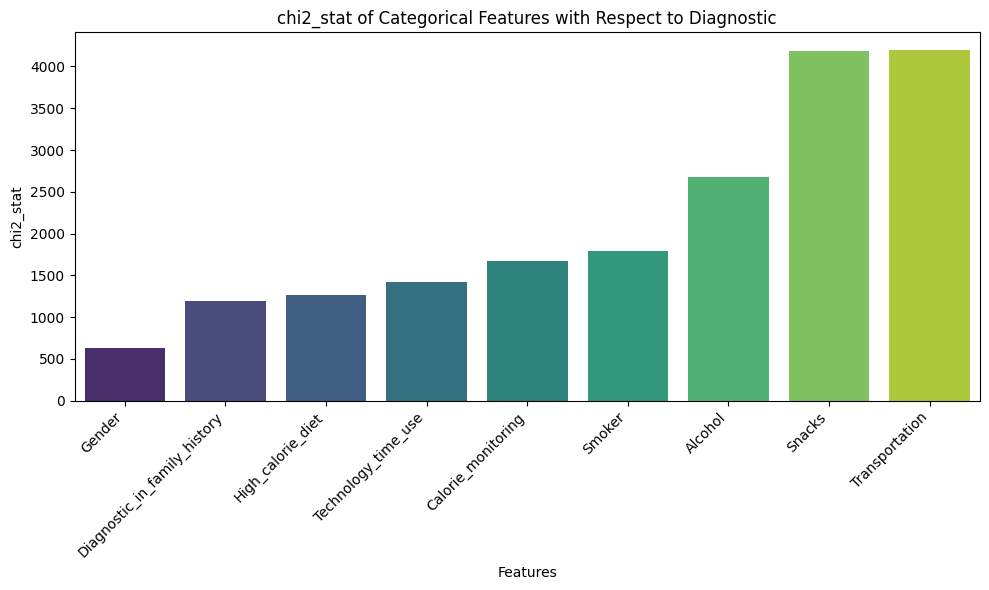

In [18]:
import scipy.stats as stats

# Initialize a DataFrame to store p-values
p_values = pd.DataFrame()

# Loop through each categorical feature column and calculate the p-value with respect to the target column
for feature in df[CATEGORICAL_COLUMNS]:
    if feature != "Diagnostic":
        # Chi-square test for association between categorical variables
        chi2_stat, p_value = stats.chisquare(pd.crosstab(df[feature], df["Diagnostic"]).values.flatten())
        p_values.loc[feature, "chi2_stat"] = chi2_stat

# Sort the p-values in ascending order
p_values_sorted = p_values.sort_values(by="chi2_stat")

# Print or visualize the sorted p-values
print(p_values_sorted)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the p-values
plt.figure(figsize=(10, 6))
sns.barplot(x=p_values_sorted.index, y="chi2_stat", data=p_values_sorted, palette="viridis")
plt.xlabel("Features")
plt.ylabel("chi2_stat")
plt.title("chi2_stat of Categorical Features with Respect to Diagnostic")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Data standardization

In [ ]:
wm1 = df[df["Weight"] == -1.0].index.to_list()
outliers_final["Weight"] = outliers_final["Weight"] + wm1

for key, value in outliers_final.items():
  outliers_final[key] = list(set(value))

In [ ]:
column_means = {}
for column in outliers_final.keys():
    values_without_outliers = df.loc[~df.index.isin(outliers_final[column]), column]
    column_means[column] = values_without_outliers.mean()

for column, indexes in outliers_final.items():
    mean_without_outliers = column_means[column]
    df.loc[indexes, column] = mean_without_outliers

df.head()


,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
0,Public_Transportation,2.0,yes,no,3.73,21.0,no,2474.0,3.0,Sometimes,1.62,no,2.0,no,64.000000,0.0,1,Female,D1
1,Public_Transportation,3.0,yes,no,2.92,21.0,Sometimes,2429.0,3.0,Sometimes,1.52,yes,3.0,yes,56.000000,3.0,0,Female,D1
2,Public_Transportation,2.0,yes,no,3.85,23.0,Frequently,2656.0,3.0,Sometimes,1.80,no,2.0,no,77.000000,2.0,1,Male,D1
3,Walking,3.0,no,no,3.01,27.0,Frequently,2260.0,3.0,Sometimes,1.80,no,2.0,no,86.813274,2.0,0,Male,D2
4,Public_Transportation,2.0,no,no,2.73,22.0,Sometimes,1895.0,1.0,Sometimes,1.78,no,2.0,no,89.800000,0.0,0,Male,D3


# Scaler

In [ ]:
for col in NUMERICAL_COLUMNS:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

scaler = StandardScaler()
df[NUMERICAL_COLUMNS] = scaler.fit_transform(df[NUMERICAL_COLUMNS])

for col in CATEGORICAL_COLUMNS:
    df[col] = df[col].astype("category")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col] )


In [ ]:
df["Diagnostic"] = df["Diagnostic"].astype("category")
le = LabelEncoder()
df["Diagnostic"] = le.fit_transform(df["Diagnostic"])

In [ ]:
df.head()

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
0,3,-0.788804,1,0,0.925743,-0.523641,3,0.507676,0.406339,2,-0.882970,0,-0.016971,0,-9.168937e-01,-1.183955,1,0,1
1,3,1.087615,1,0,-0.481837,-0.523641,2,0.403980,0.406339,2,-1.956135,1,1.620025,1,-1.238424e+00,2.323574,0,0,1
2,3,-0.788804,1,0,1.134273,-0.211348,1,0.927066,0.406339,2,1.048726,0,-0.016971,0,-3.944076e-01,1.154398,1,1,1
3,4,1.087615,0,0,-0.325439,0.413239,1,0.014546,0.406339,2,1.048726,0,-0.016971,0,-5.711518e-16,1.154398,0,1,2
4,3,-0.788804,0,0,-0.812010,-0.367495,2,-0.826540,-2.161134,2,0.834093,0,-0.016971,0,1.200402e-01,-1.183955,0,1,3


In [ ]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_new = sel.fit_transform(df.iloc[:, :-1])

X = X_new
y = np.ravel(df.iloc[:, -1:])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
sel.get_feature_names_out()

array(['Transportation', 'Regular_fiber_diet', 'Sedentary_hours_daily',
       'Age', 'Alcohol', 'Est_avg_calorie_intake', 'Main_meals_daily',
       'Snacks', 'Height', 'Water_daily', 'Weight',
       'Physical_activity_level', 'Technology_time_use', 'Gender'],
      dtype=object)

In [ ]:
print(df.iloc[0, :-1])
print(X_test[0,:])

Transportation                  3.000000
Regular_fiber_diet             -0.788804
Diagnostic_in_family_history    1.000000
High_calorie_diet               0.000000
Sedentary_hours_daily           0.925743
Age                            -0.523641
Alcohol                         3.000000
Est_avg_calorie_intake          0.507676
Main_meals_daily                0.406339
Snacks                          2.000000
Height                         -0.882970
Smoker                          0.000000
Water_daily                    -0.016971
Calorie_monitoring              0.000000
Weight                         -0.916894
Physical_activity_level        -1.183955
Technology_time_use             1.000000
Gender                          0.000000
Name: 0, dtype: float64
[ 0.         -1.2563912  -0.29068441  0.88220421  2.         -0.20206263
  0.40633864  2.          0.61946035 -0.01227135  1.01257108 -1.18395511
  0.          1.        ]


# Algorithms

In [ ]:
def custom_scoring(clf, X, y_true):
    y_pred = clf.predict(X)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=0.0)
    accuracy = accuracy_score(y_true, y_pred)
    return {'precision': precision, 'recall': recall, 'f1': f1, 'accuracy': accuracy}

In [ ]:
def map_results(results, cols):
  cv_results = pd.DataFrame(results)

  cv_results.set_index(cols, inplace=True)

  cv_results = cv_results[['mean_test_precision', 'std_test_precision',
          'mean_test_recall', 'std_test_recall',
          'mean_test_f1', 'std_test_f1',
          'mean_test_accuracy', 'std_test_accuracy']]

  cv_results = cv_results.round(3)
  cv_results = cv_results.astype(str)

  cv_results.columns = ['Precision', 'Precision dev', 'Recall', 'Recall dev', 'F1 Score', 'F1 Score dev', 'Accuracy', 'Accuracy dev']

  css_styles = [
      {'selector': 'th, td', 'props': [('border', '1px solid #dddddd'), ('padding', '8px'), ('color', '#333333')]},
      {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('color', '#333333')]},
      {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f8f9fa')]},
      {'selector': 'tr:hover', 'props': [('background-color', '#eaeaea')]},
      {'selector': '.highlight', 'props': [('background-color', '#ffe6e6')]}
  ]

  highlight_specific = cv_results.style.highlight_max(subset=['Precision', 'Recall', 'F1 Score', 'Accuracy'], axis=0)
  highlight_specific.set_table_styles(css_styles)

  display(highlight_specific)


In [ ]:
svc = SVC()
param_grid_svc = {'C': [0.01, 0.1, 1, 10,],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

etc = ExtraTreesClassifier()
param_grid_etc = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 7, None],
               'max_features': [.5, .75, None]}
rfc = RandomForestClassifier()
param_grid_rfc = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 7, None],
               'max_features': [.5, .75, None]}

btc = xgb.XGBClassifier()
param_grid_btc = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 7, None],
               'learning_rate': [1e-1, 1e-2, 1e-3]}

# algs = [svc, etc, rfc]
# grids = [param_grid_svc, param_grid_etc, param_grid_rfc]
algs = [btc]
grids = [param_grid_btc]

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


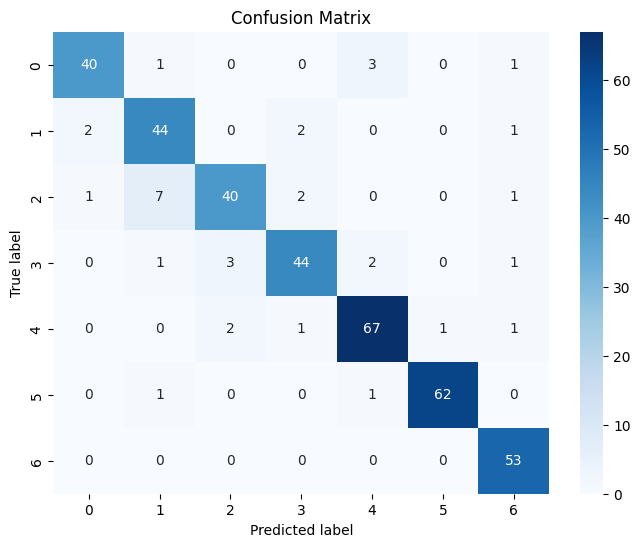

,,,Precision,Precision dev,Recall,Recall dev,F1 Score,F1 Score dev,Accuracy,Accuracy dev
param_n_estimators,param_max_depth,param_learning_rate,,,,,,,,
50,5,0.100000,0.891,0.017,0.889,0.019,0.888,0.018,0.889,0.019
100,5,0.100000,0.907,0.009,0.905,0.01,0.905,0.01,0.905,0.01
200,5,0.100000,0.913,0.012,0.91,0.013,0.91,0.013,0.91,0.013
50,7,0.100000,0.897,0.015,0.894,0.016,0.894,0.015,0.894,0.016
100,7,0.100000,0.905,0.011,0.903,0.012,0.903,0.012,0.903,0.012
200,7,0.100000,0.915,0.011,0.913,0.011,0.913,0.011,0.913,0.011
50,nan,0.100000,0.897,0.011,0.895,0.013,0.894,0.012,0.895,0.013
100,nan,0.100000,0.909,0.011,0.906,0.011,0.906,0.011,0.906,0.011
200,nan,0.100000,0.914,0.013,0.911,0.014,0.911,0.013,0.911,0.014


In [ ]:
for alg, grid in zip(algs, grids):
  grid_search = GridSearchCV(alg, grid, cv=5, scoring=custom_scoring, refit='f1')
  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_
  print("Best Parameters:", best_params)

  best_svc = grid_search.best_estimator_
  y_pred = best_svc.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
              xticklabels=np.unique(y_pred),
              yticklabels=np.unique(y_test))
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.title('Confusion Matrix')
  plt.show()

  map_results(grid_search.cv_results_, ["param_" + key for key in list(grid.keys())])